**IMPORT CSV**

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
df_ispa = pd.read_excel('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_kesehatan/ispa_excel.xls')
df_climate = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/uji_metode/climate_all_year_time.csv')

In [3]:
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   KABKOT  300 non-null    object
 1   Month   300 non-null    int64 
 2   Year    300 non-null    int64 
 3   ISPA    300 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.5+ KB


In [4]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  300 non-null    int64  
 1   Unnamed: 0    300 non-null    int64  
 2   KABKOT        300 non-null    object 
 3   month         300 non-null    int64  
 4   year          300 non-null    int64  
 5   longitude     300 non-null    float64
 6   latitude      300 non-null    float64
 7   RH            300 non-null    float64
 8   time          300 non-null    object 
 9   t2m           300 non-null    float64
 10  tp            300 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 25.9+ KB


**SET THE TIME TO .DATETIME FORMAT**

In [5]:
df_climate_ispa = df_climate.merge(df_ispa, how='inner')
df_climate_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  18000 non-null  int64  
 1   Unnamed: 0    18000 non-null  int64  
 2   KABKOT        18000 non-null  object 
 3   month         18000 non-null  int64  
 4   year          18000 non-null  int64  
 5   longitude     18000 non-null  float64
 6   latitude      18000 non-null  float64
 7   RH            18000 non-null  float64
 8   time          18000 non-null  object 
 9   t2m           18000 non-null  float64
 10  tp            18000 non-null  float64
 11  Month         18000 non-null  int64  
 12  Year          18000 non-null  int64  
 13  ISPA          18000 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 1.9+ MB


In [6]:
df_climate_ispa.describe()

,Unnamed: 0.1,Unnamed: 0,month,year,longitude,latitude,RH,t2m,tp,Month,Year,ISPA
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,149.500000,149.500000,6.500000,2020.000000,106.842000,-6.205333,80.452865,27.418990,5.859645,6.500000,2020.000000,15619.363333
std,86.604465,86.604465,3.452148,1.414253,0.057885,0.059606,4.707700,0.495328,3.707893,3.452148,1.414253,15705.015641
min,0.000000,0.000000,1.000000,2018.000000,106.750000,-6.283333,68.119665,26.095241,0.286658,1.000000,2018.000000,846.000000
25%,74.750000,74.750000,3.750000,2019.000000,106.808333,-6.260000,78.811463,27.094362,2.733340,3.750000,2019.000000,5044.750000
50%,149.500000,149.500000,6.500000,2020.000000,106.850000,-6.200000,81.855138,27.407935,5.544403,6.500000,2020.000000,10007.000000
75%,224.250000,224.250000,9.250000,2021.000000,106.891667,-6.158333,83.671870,27.756224,8.302740,9.250000,2021.000000,23655.750000
max,299.000000,299.000000,12.000000,2022.000000,106.910000,-6.125000,87.242365,28.822052,16.167215,12.000000,2022.000000,149379.000000


In [7]:
df_climate_ispa.to_csv('climate_ispa_year.csv')

In [8]:
df_climate_ispa['time']= pd.to_datetime(df_climate_ispa['time'])

In [9]:
df_climate_ispa['month'] = df_climate_ispa['time'].dt.month
df_climate_ispa['year'] = df_climate_ispa['time'].dt.year

**IMPORT SHP FILE**

In [10]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/petadki_kota/Kota_DKIJakarta.shp")

In [11]:
gdf_shapefile.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PROVNO    6 non-null      object  
 1   KABKOTNO  6 non-null      object  
 2   PROVINSI  6 non-null      object  
 3   KABKOT    6 non-null      object  
 4   geometry  6 non-null      geometry
dtypes: geometry(1), object(4)
memory usage: 372.0+ bytes


In [12]:
gdf_shapefile.to_csv('shp.csv')

**CREATE GEOMETRY FROM SHP AND CSV**

In [13]:
geometry = gpd.points_from_xy(df_climate_ispa['longitude'], df_climate_ispa['latitude'])
gdf_climate_ispa = gpd.GeoDataFrame(df_climate_ispa, geometry=geometry, crs='4326')

In [14]:
gdf_climate_ispa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  18000 non-null  int64         
 1   Unnamed: 0    18000 non-null  int64         
 2   KABKOT        18000 non-null  object        
 3   month         18000 non-null  int32         
 4   year          18000 non-null  int32         
 5   longitude     18000 non-null  float64       
 6   latitude      18000 non-null  float64       
 7   RH            18000 non-null  float64       
 8   time          18000 non-null  datetime64[ns]
 9   t2m           18000 non-null  float64       
 10  tp            18000 non-null  float64       
 11  Month         18000 non-null  int64         
 12  Year          18000 non-null  int64         
 13  ISPA          18000 non-null  int64         
 14  geometry      18000 non-null  geometry      
dtypes: datetime64[ns](1), float6

In [15]:
gdf_climate_ispa.to_csv('coba_merge.csv')

<Axes: >

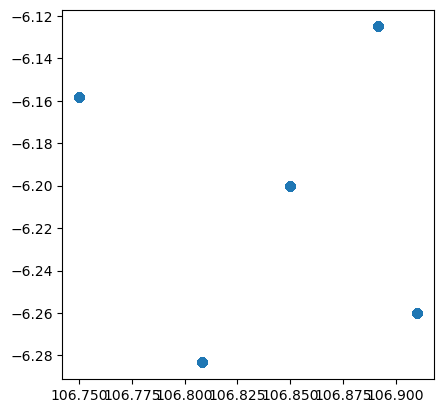

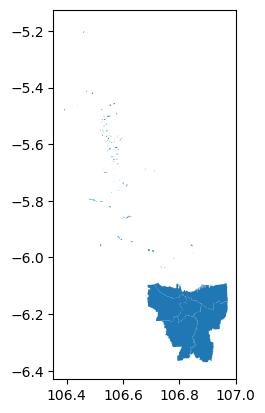

In [16]:
gdf_climate_ispa.plot()
gdf_shapefile.plot()

In [17]:
#join all the variables
result = gdf_climate_ispa.merge(gdf_shapefile, on='KABKOT')
result['geometry'] = result['geometry_y']
result = gpd.GeoDataFrame(result)
#add the columns
result_pop = result[['longitude', 'latitude', 'month', 'year', 'ISPA', 'geometry', 'KABKOT','time']]
result.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  18000 non-null  int64         
 1   Unnamed: 0    18000 non-null  int64         
 2   KABKOT        18000 non-null  object        
 3   month         18000 non-null  int32         
 4   year          18000 non-null  int32         
 5   longitude     18000 non-null  float64       
 6   latitude      18000 non-null  float64       
 7   RH            18000 non-null  float64       
 8   time          18000 non-null  datetime64[ns]
 9   t2m           18000 non-null  float64       
 10  tp            18000 non-null  float64       
 11  Month         18000 non-null  int64         
 12  Year          18000 non-null  int64         
 13  ISPA          18000 non-null  int64         
 14  geometry_x    18000 non-null  geometry      
 15  PROVNO        18000 non-null

<Axes: >

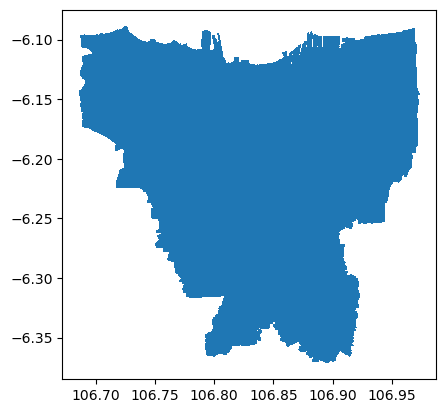

In [18]:
result_pop.plot()

In [19]:
result_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   longitude  18000 non-null  float64       
 1   latitude   18000 non-null  float64       
 2   month      18000 non-null  int32         
 3   year       18000 non-null  int32         
 4   ISPA       18000 non-null  int64         
 5   geometry   18000 non-null  geometry      
 6   KABKOT     18000 non-null  object        
 7   time       18000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), geometry(1), int32(2), int64(1), object(1)
memory usage: 984.5+ KB


**SHOW THE COLUMNS**

In [20]:
# Dissolve berdasarkan 'KABKOT' dan 'month' dengan fungsi agregasi mean
dissolved_result = result_pop.dissolve(by=['KABKOT', 'month','year'])
dissolved_result.head()

geometry  \
KABKOT        month year                                                      
JAKARTA BARAT 1     2018  POLYGON Z ((106.71235 -6.09674 0.00000, 106.71...   
                    2019  POLYGON Z ((106.71235 -6.09674 0.00000, 106.71...   
                    2020  POLYGON Z ((106.71235 -6.09674 0.00000, 106.71...   
                    2021  POLYGON Z ((106.71235 -6.09674 0.00000, 106.71...   
                    2022  POLYGON Z ((106.71235 -6.09674 0.00000, 106.71...   

                          longitude  latitude   ISPA       time  
KABKOT        month year                                         
JAKARTA BARAT 1     2018     106.75 -6.158333  35036 2018-01-01  
                    2019     106.75 -6.158333  35036 2019-01-01  
                    2020     106.75 -6.158333  35036 2020-01-01  
                    2021     106.75 -6.158333  35036 2021-01-01  
                    2022     106.75 -6.158333  35036 2022-01-01

In [31]:
dissolved_result = dissolved_result.reset_index()

In [33]:
dissolved_result

,KABKOT,month,year,geometry,longitude,latitude,ISPA,time
0,JAKARTA BARAT,1,2018,"POLYGON Z ((106.71235 -6.09674 0.00000, 106.71...",106.750000,-6.158333,35036,2018-01-01
1,JAKARTA BARAT,1,2019,"POLYGON Z ((106.71235 -6.09674 0.00000, 106.71...",106.750000,-6.158333,35036,2019-01-01
2,JAKARTA BARAT,1,2020,"POLYGON Z ((106.71235 -6.09674 0.00000, 106.71...",106.750000,-6.158333,35036,2020-01-01
3,JAKARTA BARAT,1,2021,"POLYGON Z ((106.71235 -6.09674 0.00000, 106.71...",106.750000,-6.158333,35036,2021-01-01
4,JAKARTA BARAT,1,2022,"POLYGON Z ((106.71235 -6.09674 0.00000, 106.71...",106.750000,-6.158333,35036,2022-01-01
...,...,...,...,...,...,...,...,...
295,JAKARTA UTARA,12,2018,"POLYGON Z ((106.72649 -6.08975 0.00000, 106.72...",106.891667,-6.125000,26403,2018-12-01
296,JAKARTA UTARA,12,2019,"POLYGON Z ((106.72649 -6.08975 0.00000, 106.72...",106.891667,-6.125000,26403,2019-12-01
297,JAKARTA UTARA,12,2020,"POLYGON Z ((106.72649 -6.08975 0.00000, 106.72...",106.891667,-6.125000,26403,2020-12-01
298,JAKARTA UTARA,12,2021,"POLYGON Z ((106.72649 -6.08975 0.00000, 106.72...",106.891667,-6.125000,26403,2021-12-01


In [22]:
#download data to .csv format
dissolved_result.to_csv('ISPA_climate_year2.csv')

**SET FOR MAPPING**

In [23]:
# ubah per month
import pandas as pd

In [24]:
#change into dataframe to drop the 'geometry' columns, etc
dissolved_result_df= pd.DataFrame(dissolved_result)
dissolved_result_df = dissolved_result_df.drop(['geometry'], axis = 1)

In [25]:
dissolved_result_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 300 entries, ('JAKARTA BARAT', 1, 2018) to ('JAKARTA UTARA', 12, 2022)
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   longitude  300 non-null    float64       
 1   latitude   300 non-null    float64       
 2   ISPA       300 non-null    int64         
 3   time       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 18.8+ KB


In [26]:
dissolved_result_df = dissolved_result_df.sort_values(by=[ 'year', 'KABKOT', 'month'])

In [27]:
dissolved_result_df

longitude  latitude   ISPA       time
KABKOT        month year                                        
JAKARTA BARAT 1     2018  106.750000 -6.158333  35036 2018-01-01
              2     2018  106.750000 -6.158333  35036 2018-02-01
              3     2018  106.750000 -6.158333  35036 2018-03-01
              4     2018  106.750000 -6.158333  35036 2018-04-01
              5     2018  106.750000 -6.158333  35036 2018-05-01
...                              ...       ...    ...        ...
JAKARTA UTARA 8     2022  106.891667 -6.125000  26403 2022-08-01
              9     2022  106.891667 -6.125000  26403 2022-09-01
              10    2022  106.891667 -6.125000  26403 2022-10-01
              11    2022  106.891667 -6.125000  26403 2022-11-01
              12    2022  106.891667 -6.125000  26403 2022-12-01

[300 rows x 4 columns]

In [28]:
#download data to .csv format
dissolved_result_df.to_csv('ispa_climate_kabkot_year.csv')

**MAPPING**

In [29]:
import calendar
import matplotlib.pyplot as plt

**GRAPHS**

In [30]:
# Filter data for the years 2020 to 2022
data_2020_2022 = dissolved_result_df[(dissolved_result_df['year'] >= 2018) & (dissolved_result_df['year'] <= 2022)]

# Create a figure with subplots for each city
fig = plt.figure(figsize=(15, 20))
cities = list(data_2020_2022['KABKOT'].unique())

# Iterate through each city and plot the total TB cases for the years 2020 to 2022
for idx, city in enumerate(cities, start=1):
    # Filter data for the current city and years 2020 to 2022
    data_city_2020_2022 = data_2020_2022[data_2020_2022['KABKOT'] == city]

    # Calculate the monthly averages
    monthly_total = data_city_2020_2022.groupby('month')['ISPA'].sum()

    # Plot the map for the current city
    plt.subplot(len(cities), 1, idx)
    plt.plot(monthly_total, marker='o')
    plt.title(f'{city} - Jumlah Kejadian Tuberkulosis Tahun 2020-2022')
    plt.xlabel('Bulan')
    plt.ylabel('Kejadian Tuberkulosis (jiwa)')
    plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

KeyError: 'year'